In [1]:
from hest import iter_hest
import scanpy as sc
import numpy as np
from scipy.stats import pearsonr
from tqdm import tqdm

In [2]:
id_list = ["ZEN49"]

adata = None
adata_stage = None
adata_sample = None

int_id = 0
for st in iter_hest('ocamargo/hest_data', id_list=id_list):
    adata = st.adata
    adata.var_names_make_unique()
    adata.obsm["coord"] = adata.obs[["array_col", "array_row"]].to_numpy()

    # Flip Y-axis
    adata.obsm['coord'][:, 1] = adata.obsm['coord'][:, 1] * (-1)

    # Preprocess adata
    sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=500)
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)

    # Load pre-normalized stage data
    adata_stage = sc.read_h5ad(f'./HEST_TASK8/{id_list[int_id]}/down_ratio0.5/recovered_data.h5ad')
    adata_sample = sc.read_h5ad(f'./HEST_TASK8/{id_list[int_id]}/down_ratio0.5/sampled_data.h5ad')

/blue/tkahveci/ocamargo/.conda/envs/hest/lib/python3.10/site-packages/hestcore/wsi.py:27: UserWarning: CuImage is not available. Ensure you have a GPU and cucim installed to use GPU acceleration.
  warnings.warn("CuImage is not available. Ensure you have a GPU and cucim installed to use GPU acceleration.")


### Tumor Cluster 1

In [38]:
# Select marker genes
show_gene=['ID1', 'GGH', 'GADD45B']

[<Axes: title={'center': 'ID1'}, xlabel='coord1', ylabel='coord2'>,
 <Axes: title={'center': 'GGH'}, xlabel='coord1', ylabel='coord2'>,
 <Axes: title={'center': 'GADD45B'}, xlabel='coord1', ylabel='coord2'>]

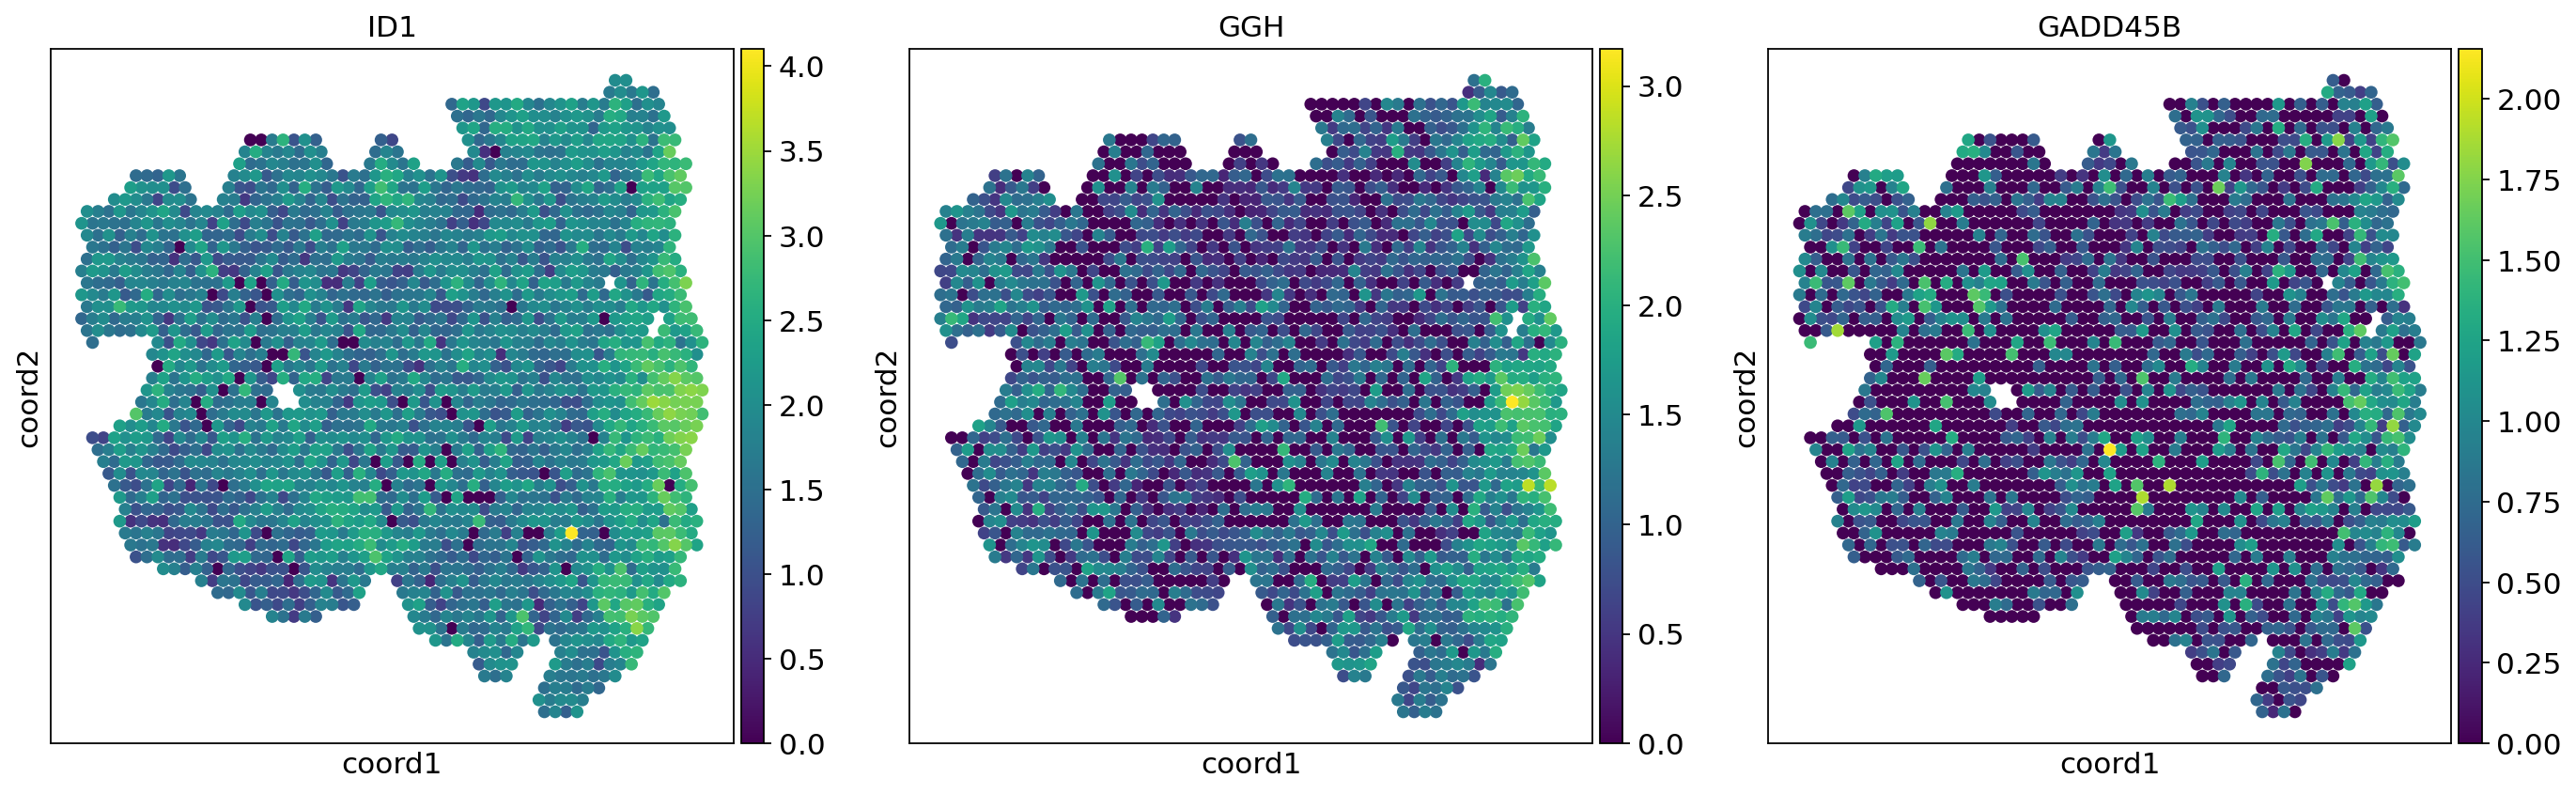

In [39]:
sc.set_figure_params(dpi=80, figsize=(6, 6))
sc.pl.embedding(adata, basis="coord", color=show_gene, s=150, show=False)

In [44]:
adata_sample.obsm['coord'][:, 1] = adata_sample.obsm['coord'][:, 1] * (-1)

[<Axes: title={'center': 'ID1'}, xlabel='coord1', ylabel='coord2'>,
 <Axes: title={'center': 'GGH'}, xlabel='coord1', ylabel='coord2'>,
 <Axes: title={'center': 'GADD45B'}, xlabel='coord1', ylabel='coord2'>]

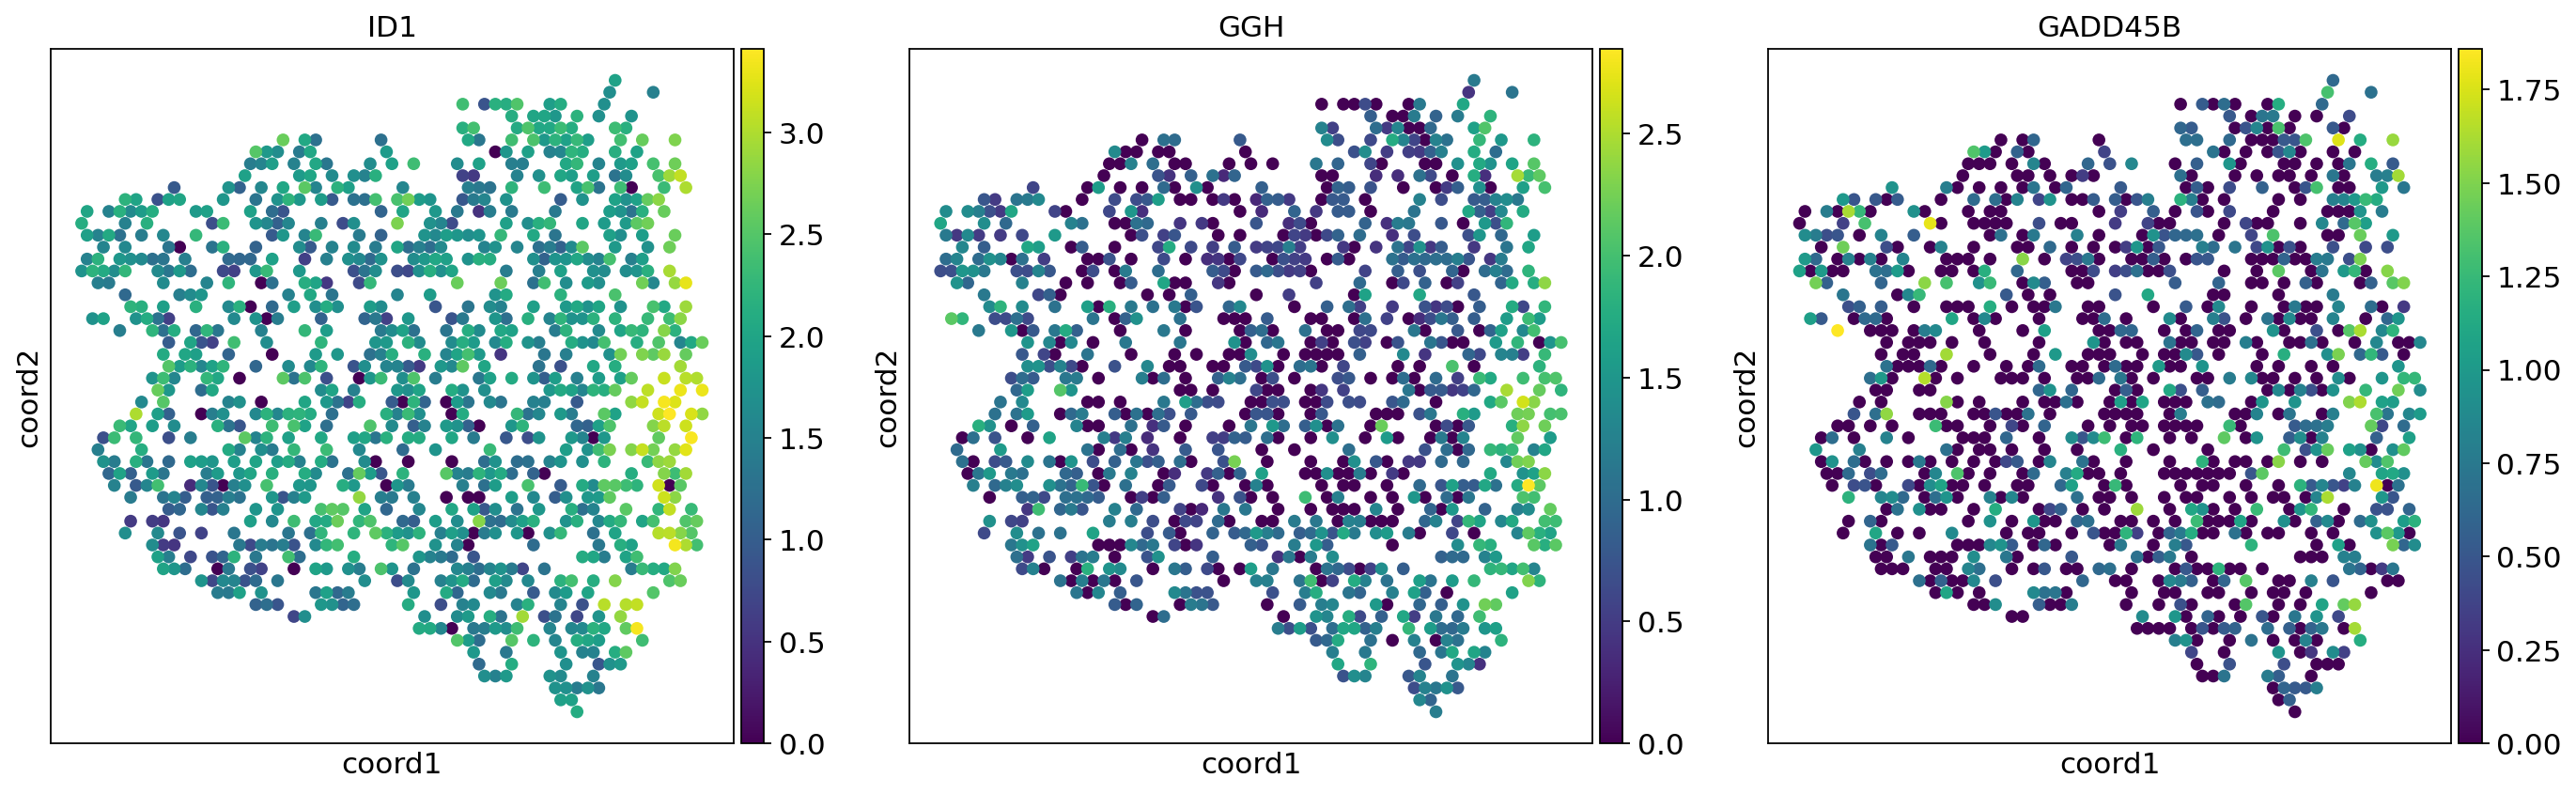

In [45]:
sc.set_figure_params(dpi=80, figsize=(6, 6))
sc.pl.embedding(adata_sample, basis="coord", color=show_gene, s=150, show=False)

In [46]:
adata_stage.obsm['coord'][:, 1] = adata_stage.obsm['coord'][:, 1] * (-1)

[<Axes: title={'center': 'ID1'}, xlabel='coord1', ylabel='coord2'>,
 <Axes: title={'center': 'GGH'}, xlabel='coord1', ylabel='coord2'>,
 <Axes: title={'center': 'GADD45B'}, xlabel='coord1', ylabel='coord2'>]

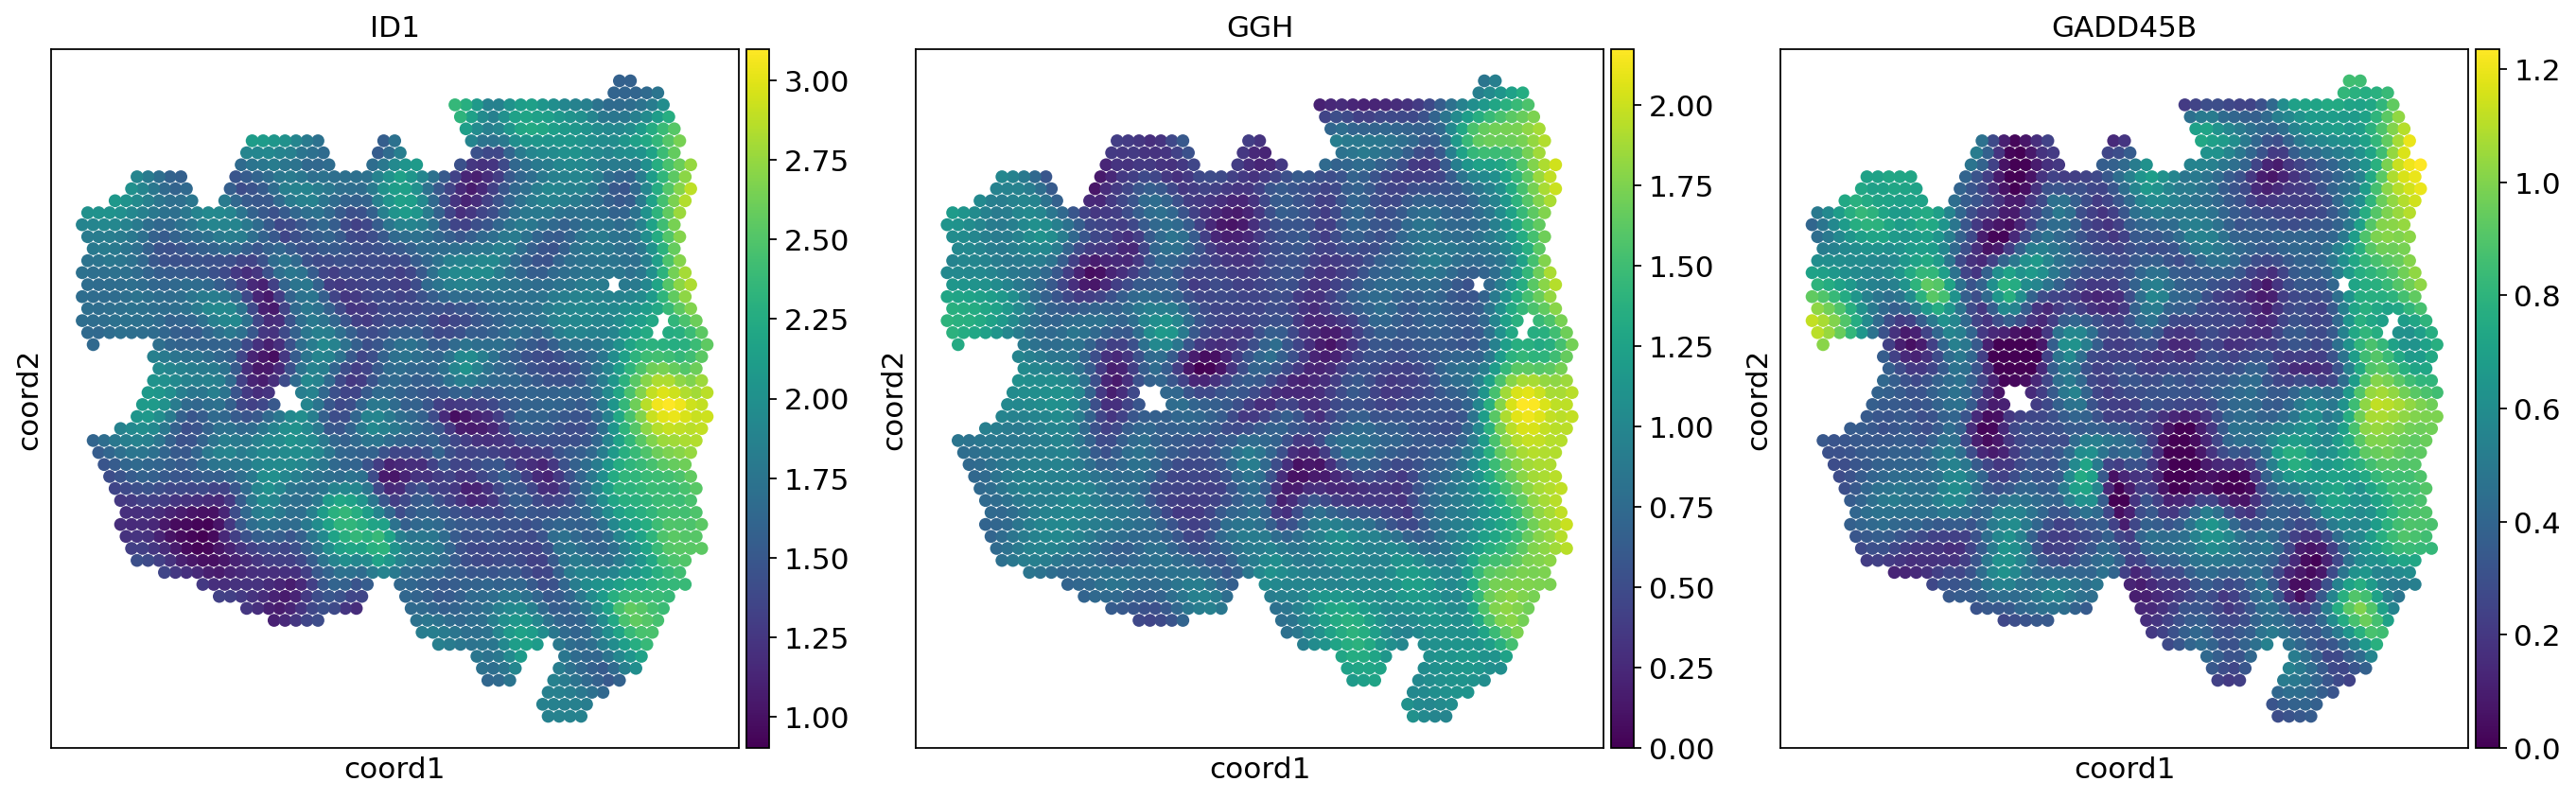

In [47]:
sc.set_figure_params(dpi=80, figsize=(6, 6))
sc.pl.embedding(adata_stage, basis="coord", color=show_gene, s=150, show=False)

### Tumor Cluster 2

In [54]:
# Select marker genes
show_gene=['ANXA11', 'ANPEP', 'LCN15']

[<Axes: title={'center': 'ANXA11'}, xlabel='coord1', ylabel='coord2'>,
 <Axes: title={'center': 'ANPEP'}, xlabel='coord1', ylabel='coord2'>,
 <Axes: title={'center': 'LCN15'}, xlabel='coord1', ylabel='coord2'>]

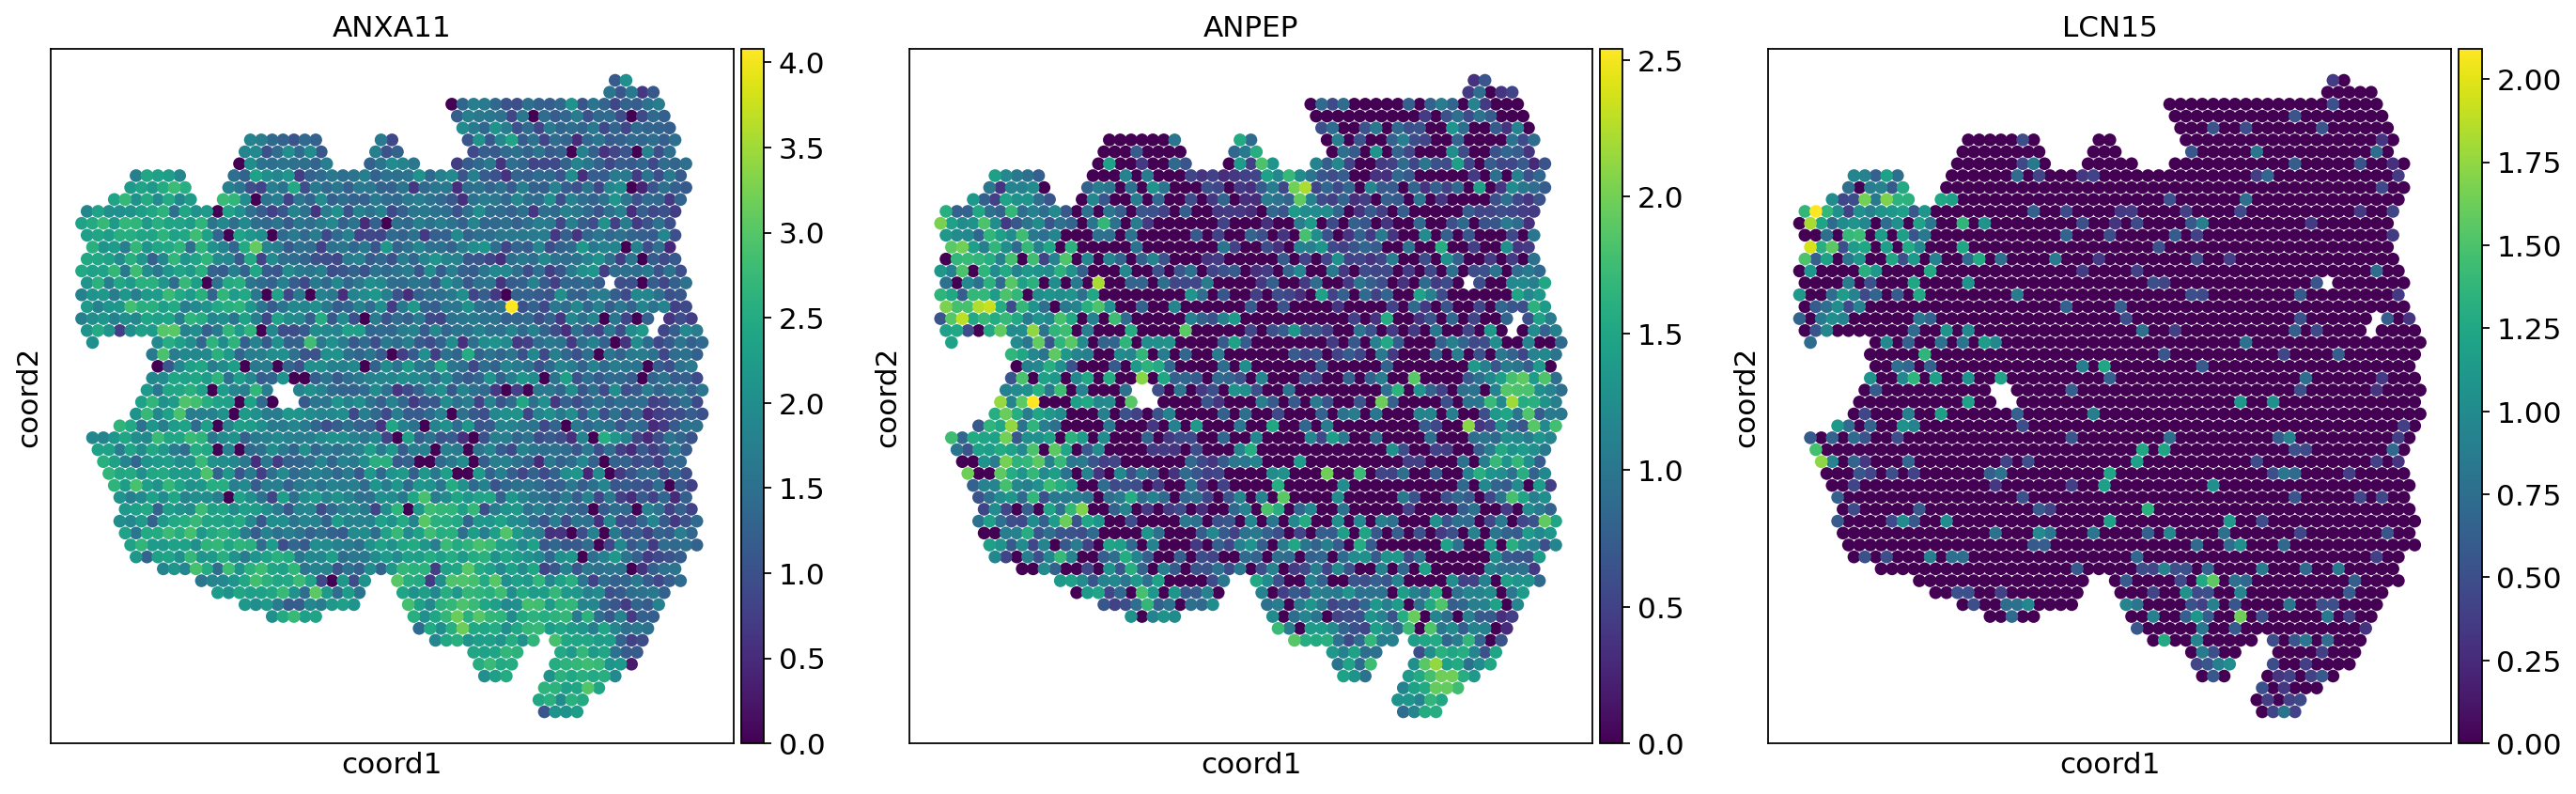

In [55]:
sc.set_figure_params(dpi=80, figsize=(6, 6))
sc.pl.embedding(adata, basis="coord", color=show_gene, s=150, show=False)

[<Axes: title={'center': 'ANXA11'}, xlabel='coord1', ylabel='coord2'>,
 <Axes: title={'center': 'ANPEP'}, xlabel='coord1', ylabel='coord2'>,
 <Axes: title={'center': 'LCN15'}, xlabel='coord1', ylabel='coord2'>]

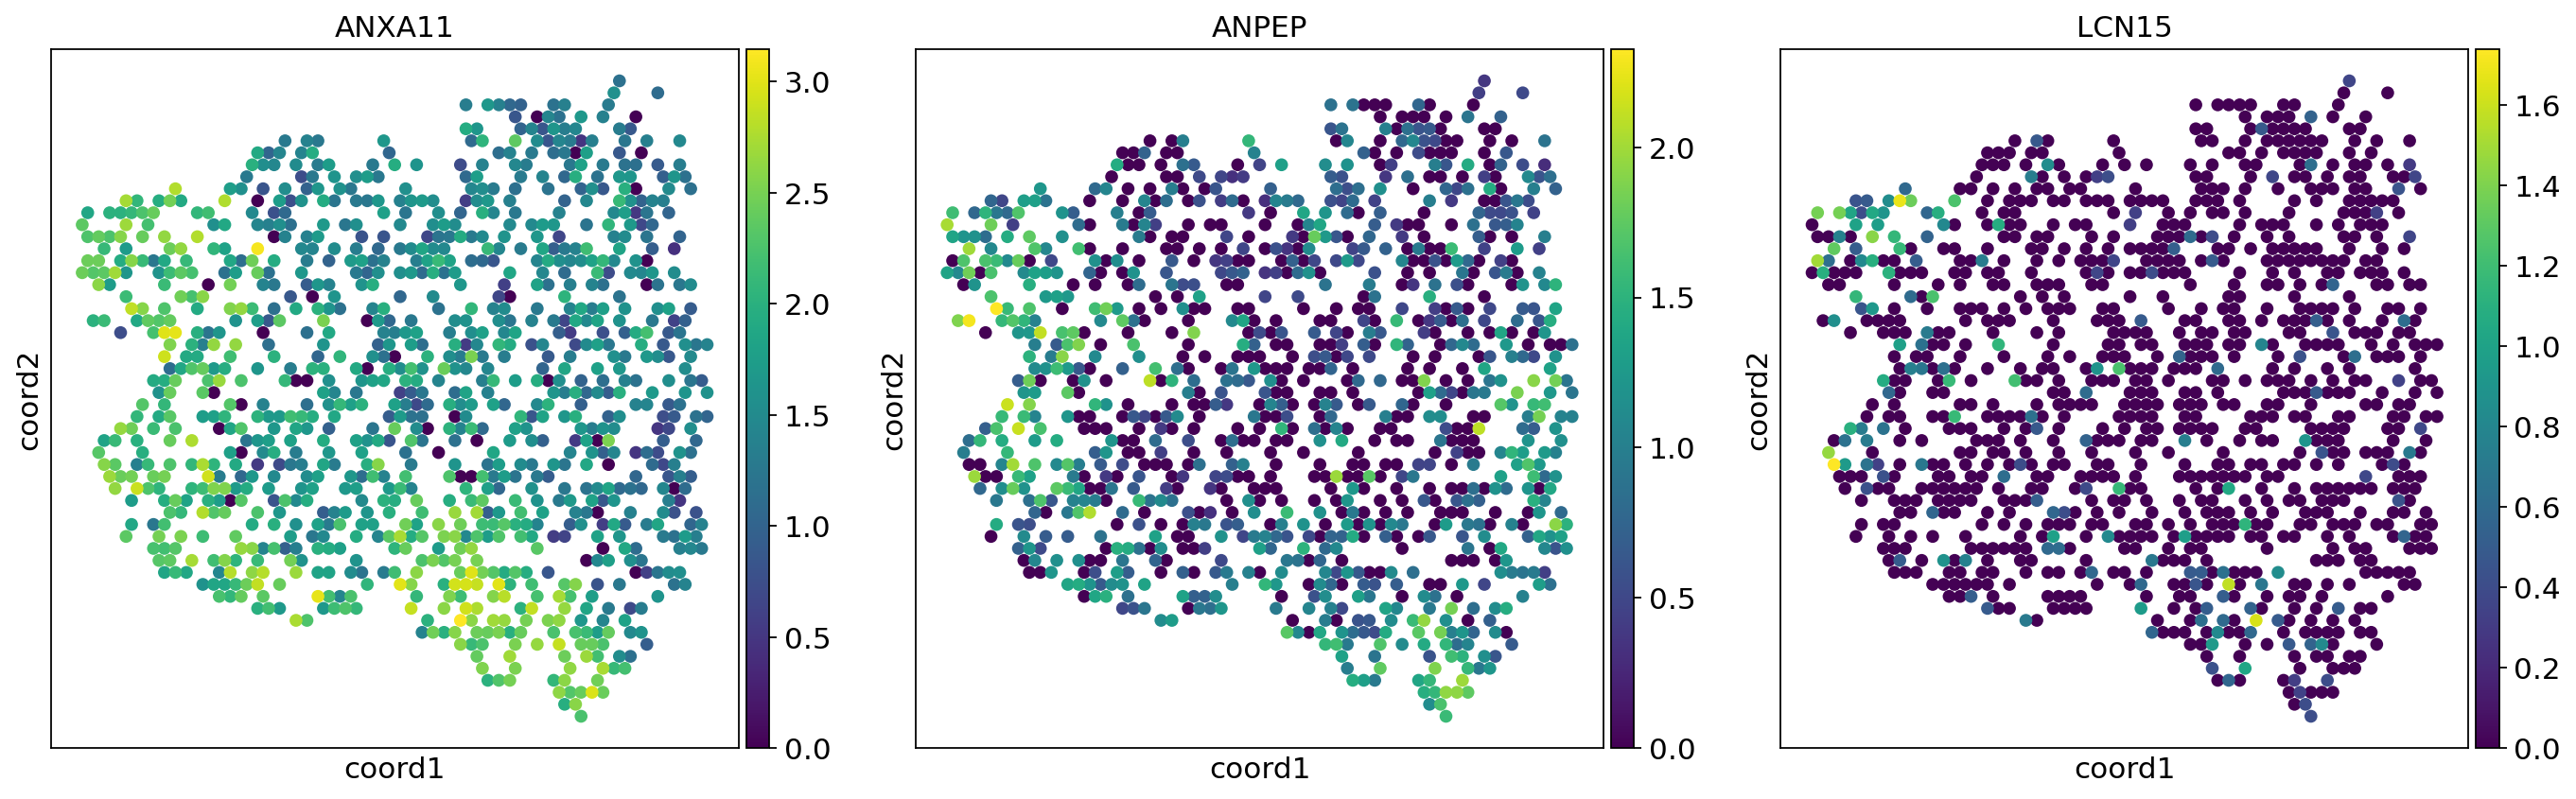

In [56]:
sc.set_figure_params(dpi=80, figsize=(6, 6))
sc.pl.embedding(adata_sample, basis="coord", color=show_gene, s=150, show=False)

[<Axes: title={'center': 'ANXA11'}, xlabel='coord1', ylabel='coord2'>,
 <Axes: title={'center': 'ANPEP'}, xlabel='coord1', ylabel='coord2'>,
 <Axes: title={'center': 'LCN15'}, xlabel='coord1', ylabel='coord2'>]

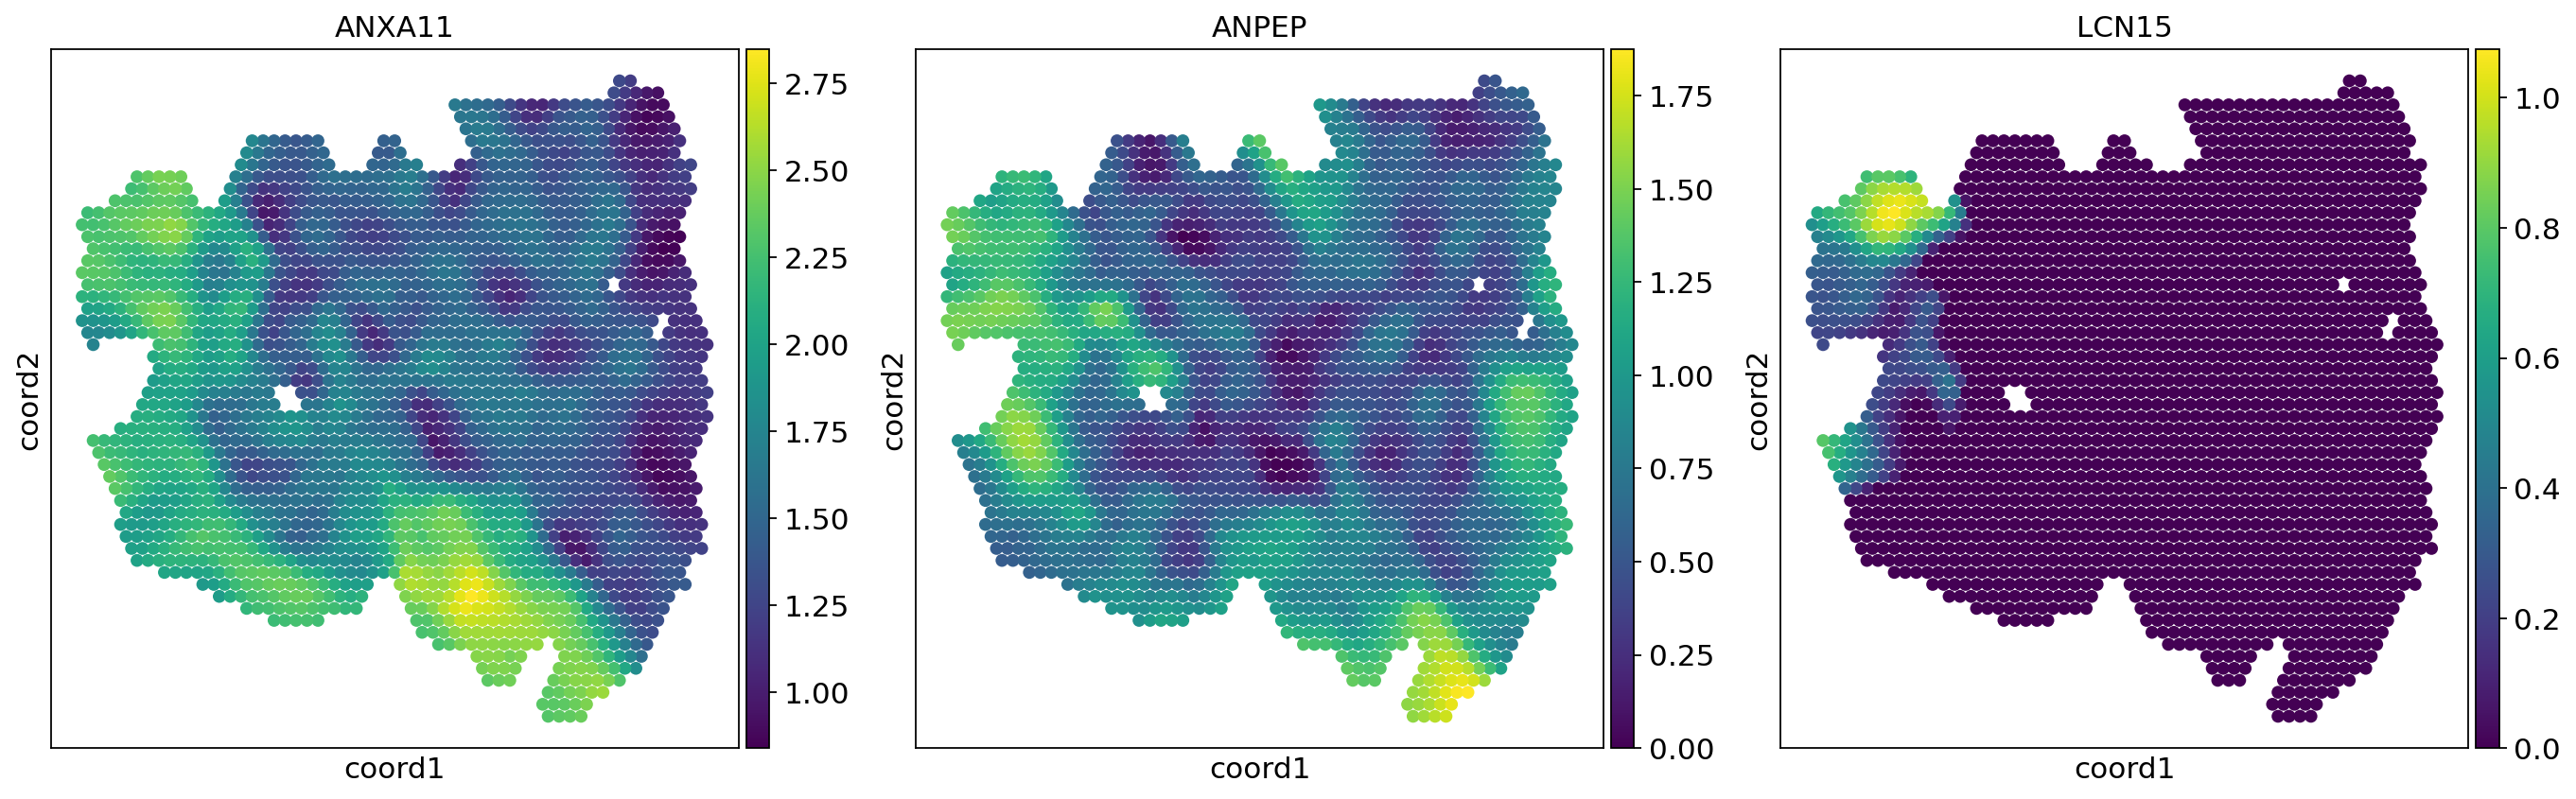

In [57]:
sc.set_figure_params(dpi=80, figsize=(6, 6))
sc.pl.embedding(adata_stage, basis="coord", color=show_gene, s=150, show=False)